# Librerias

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# Cultivo

In [2]:

data = {
    'País': ['Bolivia', 'Colombia', 'Peru', 'Afganistán', 'Myanmar','Laos', 'Mexico'],
    'Coca': [26000, 119794.83, 58499.21, None, None, None, None],
    'Opio': [None, 408.76, None, 187414.29, 43223.08, 4443.38, 20.000]
}

df_cultivo = pd.DataFrame(data)

In [3]:
df_cultivo.head()

,País,Coca,Opio
0,Bolivia,26000.00,NaN
1,Colombia,119794.83,408.76
2,Peru,58499.21,NaN
3,Afganistán,NaN,187414.29
4,Myanmar,NaN,43223.08


<Figure size 1000x600 with 0 Axes>

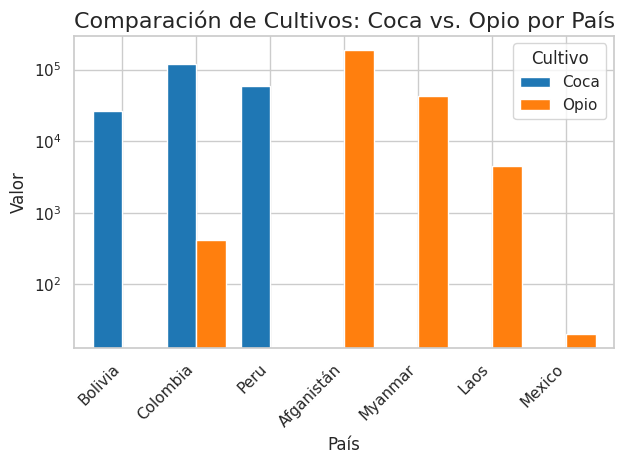

In [4]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))


df_cultivo.set_index('País')[['Coca', 'Opio']].plot(kind='bar', width=0.8, logy=True, color=['#1f77b4', '#ff7f0e'])

plt.title('Comparación de Cultivos: Coca vs. Opio por País', fontsize=16)
plt.xlabel('País', fontsize=12)
plt.ylabel('Valor', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cultivo', labels=['Coca', 'Opio'])

plt.tight_layout()
plt.show()

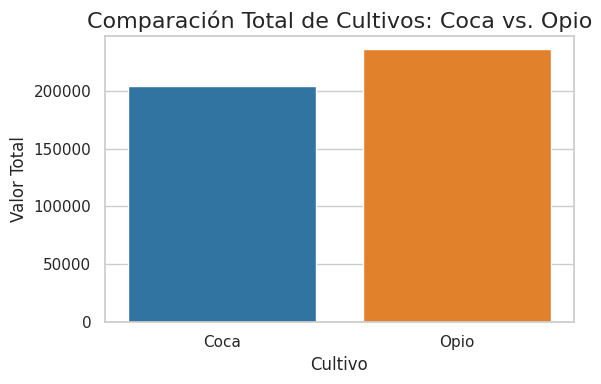

In [15]:
total_coca = df_cultivo['Coca'].sum()
total_opio = df_cultivo['Opio'].sum()

# Crear un DataFrame con los totales
df_total = pd.DataFrame({'Cultivo': ['Coca', 'Opio'], 'Valor': [total_coca, total_opio]})

# Graficar
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))

# Graficar barras
sns.barplot(x='Cultivo', y='Valor', data=df_total, palette=['#1f77b4', '#ff7f0e'])

plt.title('Comparación Total de Cultivos: Coca vs. Opio', fontsize=16)
plt.xlabel('Cultivo', fontsize=12)
plt.ylabel('Valor Total', fontsize=12)

plt.tight_layout()
plt.show()

# Produccion

In [5]:
df_produccion = pd.read_csv('../data/produccion.csv')

In [6]:
df_produccion.head()

,País,laboratorio_coca,cat_coca,laboratorio_opio,cat_opio,laboratorio_meta,cat_meta
0,Bolivia,3446.0,Alta,NaN,Sin dato,NaN,Sin dato
1,China,NaN,Sin dato,NaN,Sin dato,479.0,Alta
2,Colombia,24514.0,Alta,NaN,Sin dato,NaN,Sin dato
3,Estados Unidos,NaN,Sin dato,NaN,Sin dato,2806.0,Alta
4,Grecia,NaN,Sin dato,22.0,Alta,NaN,Sin dato


              País  laboratorio_coca  cat_coca  laboratorio_opio  cat_opio  \
0          Bolivia            3446.0      Alta               NaN  Sin dato   
1            China               NaN  Sin dato               NaN  Sin dato   
2         Colombia           24514.0      Alta               NaN  Sin dato   
3   Estados Unidos               NaN  Sin dato               NaN  Sin dato   
4           Grecia               NaN  Sin dato              22.0      Alta   
5          Malasia               NaN  Sin dato              40.0      Alta   
6             Peru            2202.0      Alta               NaN  Sin dato   
7  República Checa               NaN  Sin dato              19.0      Alta   

   laboratorio_meta  cat_meta  
0               NaN  Sin dato  
1             479.0      Alta  
2               NaN  Sin dato  
3            2806.0      Alta  
4               NaN  Sin dato  
5               NaN  Sin dato  
6               NaN  Sin dato  
7            1021.0      Alta  


# Consumo

In [7]:
df_consumo = pd.read_csv('../data/consumo.csv')

In [32]:
df_consumo.head()

,País,Cocaína,Cannabis,Metanfetaminas,Opioides,Categoría_Cocaína,Categoría_Cannabis,Categoría_Metanfetaminas,Categoría_Opioides
0,Albania,2.50,5.60,0.10,0.00,Alta,Media,Muy Baja,Sin dato
1,Alemania,1.03,6.62,1.15,0.36,Media,Media,Alta,Baja
2,Argelia,0.01,0.52,0.03,0.00,Muy baja,Muy baja,Muy Baja,Sin dato
3,Argentina,1.20,5.67,0.00,0.19,Media,Media,Sin dato,Muy baja
4,Australia,0.00,10.80,1.73,3.10,Sin dato,Alta,Alta,Alta


# Trafico

In [9]:
df_trafico = pd.read_csv('../data/trafico.csv')

In [10]:
df_trafico.head()

,País,Cocaína,Cannabis,Metanfetaminas,Heroína
0,Sri Lanka,177609.980000,1731.53,4567.113736,145917.640000
1,Australia,159530.390000,NaN,85635.359116,142964.640000
2,Finlandia,94686.555524,5751.15,14874.141876,53374.333333
3,Palestina,75000.000000,4464.29,NaN,NaN
4,Moldavia,71174.380000,NaN,NaN,126448.890000


# Mercado

In [11]:
df_mercado = pd.read_csv('../data/mercado.csv')

In [12]:
df_mercado.head(10)

,País,Población,Consumo_Tn,Mercado_USD
0,Estados Unidos,7409071,614.952893,1.875606e+10
1,Brasil,4488953,372.583099,9.314577e+08
2,India,1300000,107.900000,6.438035e+09
3,España,1056208,87.665264,3.748080e+09
4,Alemania,831375,69.004125,3.039619e+09
5,Francia,795088,65.992304,2.544187e+09
6,México,784635,65.124705,6.643807e+08
7,Australia,668847,55.514301,8.856218e+09
8,Italia,656593,54.497219,2.396256e+09
9,Argentina,506004,41.998332,2.099917e+08


# Grafos

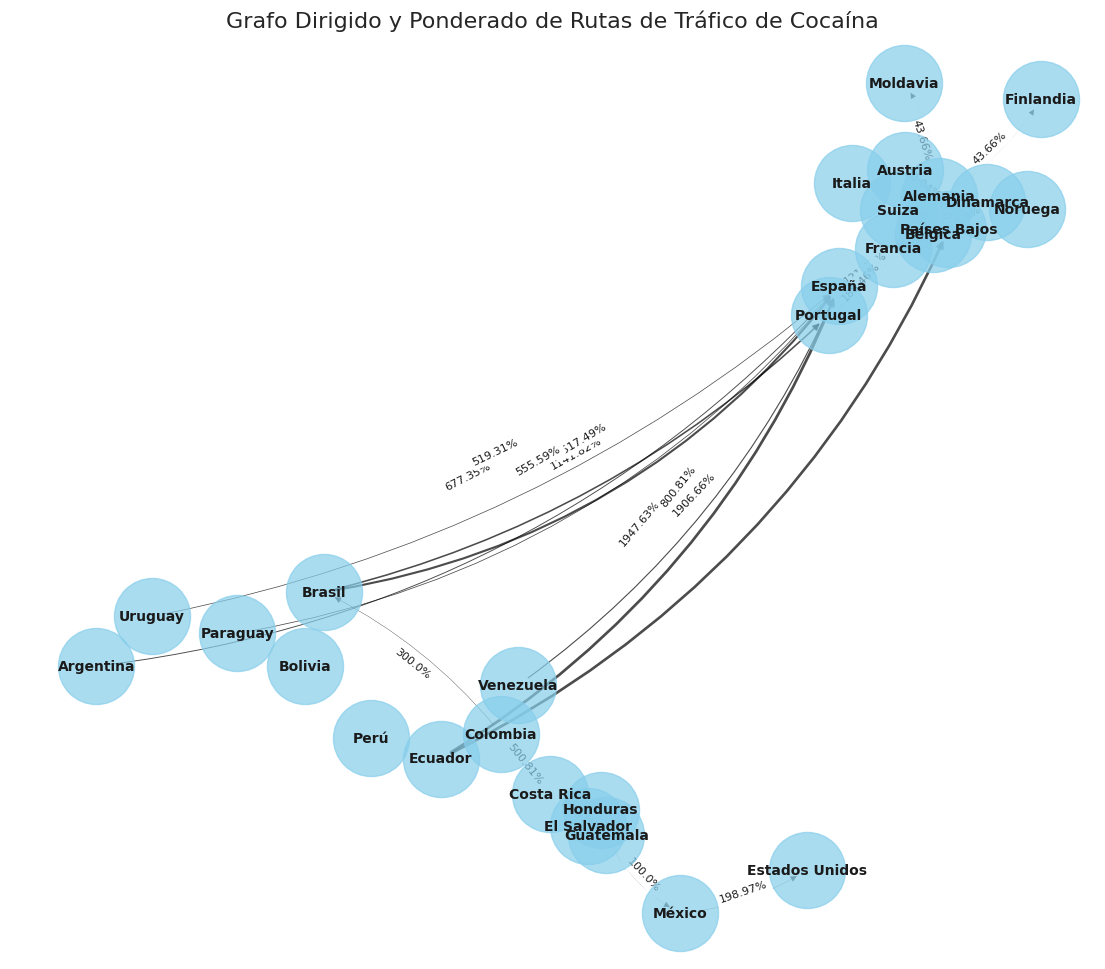

In [53]:
import networkx as nx
import matplotlib.pyplot as plt

# Diccionario con las coordenadas geográficas de los países (latitud, longitud)
country_coordinates = {
    'Colombia': (4.5709, -74.2973),
    'Perú': (-9.189967, -75.015152),
    'Bolivia': (-16.290154, -63.588653),
    'México': (23.634501, -102.552784),
    'Costa Rica': (9.748917, -83.753428),
    'Guatemala': (15.783471, -90.230759),
    'Honduras': (15.199999, -86.241905),
    'El Salvador': (13.794185, -88.89653),
    'Estados Unidos': (37.09024, -95.712891),
    'Brasil': (-14.235004, -51.92528),
    'Ecuador': (-1.831239, -78.183406),
    'Venezuela': (6.42375, -66.58973),
    'Argentina': (-38.416097, -63.616672),
    'Paraguay': (-23.442503, -58.443832),
    'Uruguay': (-32.522779, -55.765835),
    'España': (40.463667, -3.74922),
    'Portugal': (39.399872, -8.224454),
    'Bélgica': (50.503887, 4.469936),
    'Países Bajos': (52.132633, 5.291266),
    'Alemania': (51.165691, 10.451526),
    'Finlandia': (61.92411, 25.748151),
    'Moldavia': (47.411631, 28.369885),
    'Austria': (47.516231, 14.550072),
    'Noruega': (60.472024, 8.468946),
    'Francia': (46.227638, 2.213749),
    'Italia': (41.87194, 12.56738),
    'Suiza': (46.818188, 8.227512),
    'Dinamarca': (56.26392, 9.501785)
}

# Crear el grafo dirigido
G = nx.DiGraph()

# Añadir los nodos con sus coordenadas
for country, coords in country_coordinates.items():
    G.add_node(country, pos=coords)

# Añadir las aristas basadas en las rutas de tráfico y sus ponderaciones (incremento de precio)
rutas_trafico = [
    ('Colombia', 'Costa Rica', 500.81),  # Colombia → Costa Rica: 500.81% de incremento
    ('Costa Rica', 'Guatemala', 81.97),  # Costa Rica → Guatemala: 81.97% de incremento
    ('Guatemala', 'México', 100.0),     # Ejemplo: Guatemala → México: 100% de incremento
    ('México', 'Estados Unidos', 198.97),  # México → Estados Unidos: 198.97% de incremento
    ('Colombia', 'Brasil', 300.0),      # Ejemplo: Colombia → Brasil: 300% de incremento
    ('Brasil', 'Portugal', 1141.82),    # Brasil → Portugal: 1141.82% de incremento
    ('Brasil', 'España', 1517.49),      # Brasil → España: 1517.49% de incremento
    ('Ecuador', 'España', 1947.63),     # Ecuador → España: 1947.63% de incremento
    ('Ecuador', 'Países Bajos', 1906.66),  # Ecuador → Países Bajos: 1906.66% de incremento
    ('Venezuela', 'España', 800.81),    # Venezuela → España: 800.81% de incremento
    ('Argentina', 'España', 677.35),    # Argentina → España: 677.35% de incremento
    ('Paraguay', 'España', 555.59),     # Paraguay → España: 555.59% de incremento
    ('Uruguay', 'España', 519.31),      # Uruguay → España: 519.31% de incremento
    ('Portugal', 'Francia', 188.46),    # Portugal → Francia: 188.46% de incremento
    ('España', 'Francia', 121.47),      # España → Francia: 121.47% de incremento
    ('Francia', 'Alemania', 50.0),      # Ejemplo: Francia → Alemania: 50% de incremento
    ('Alemania', 'Austria', 20.04),     # Alemania → Austria: 20.04% de incremento
    ('Alemania', 'Finlandia', 43.66),   # Alemania → Finlandia: 43.66% de incremento
    ('Países Bajos', 'Alemania', 30.0), # Ejemplo: Países Bajos → Alemania: 30% de incremento
    ('Bélgica', 'Alemania', 25.0),      # Ejemplo: Bélgica → Alemania: 25% de incremento
    ('Bélgica', 'Francia', 15.0),       # Ejemplo: Bélgica → Francia: 15% de incremento
    ('Países Bajos', 'Bélgica', 10.0),  # Ejemplo: Países Bajos → Bélgica: 10% de incremento
    ('Países Bajos', 'Dinamarca', 5.0), # Ejemplo: Países Bajos → Dinamarca: 5% de incremento
    ('Dinamarca', 'Noruega', 3.0),      # Ejemplo: Dinamarca → Noruega: 3% de incremento
    ('Alemania', 'Moldavia', 43.66)     # Alemania → Moldavia: 43.66% de incremento
]

for ruta in rutas_trafico:
    G.add_edge(ruta[0], ruta[1], weight=ruta[2])  # Añadir arista con ponderación

# Obtener las posiciones de los nodos (coordenadas geográficas)
pos = nx.get_node_attributes(G, 'pos')

# Configurar el tamaño de la figura
plt.figure(figsize=(14, 12))

# Dibujar los nodos con un color más atractivo y tamaño adecuado
nx.draw_networkx_nodes(G, pos, node_size=3000, node_color='skyblue', alpha=0.7)

# Dibujar las etiquetas de los nodos (países)
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

# Dibujar las aristas con grosor proporcional a la ponderación y mayor suavidad
edge_weights = nx.get_edge_attributes(G, 'weight')

# Personalizar la estética de las aristas con un color más suave y curvado
for edge, weight in edge_weights.items():
    u, v = edge
    x_values = [pos[u][1], pos[v][1]]  # Longitudes (x)
    y_values = [pos[u][0], pos[v][0]]  # Latitudes (y)

    # Hacer las aristas curvadas para una mejor visualización
    curvature = 0.1 * np.random.uniform(1, 2)  # Control de la curvatura de las aristas
    nx.draw_networkx_edges(G, pos, edgelist=[edge], width=weight / 1000, alpha=0.7, edge_color='black', style='solid', connectionstyle=f'arc3,rad={curvature}')

# Dibujar las etiquetas de las aristas (ponderaciones) con mayor claridad
edge_labels = {(u, v): f"{d['weight']}%" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# Título y ajustes finales
plt.title("Grafo Dirigido y Ponderado de Rutas de Tráfico de Cocaína", fontsize=16)
plt.axis('off')  # Desactivar el eje para una mejor visualización
plt.show()

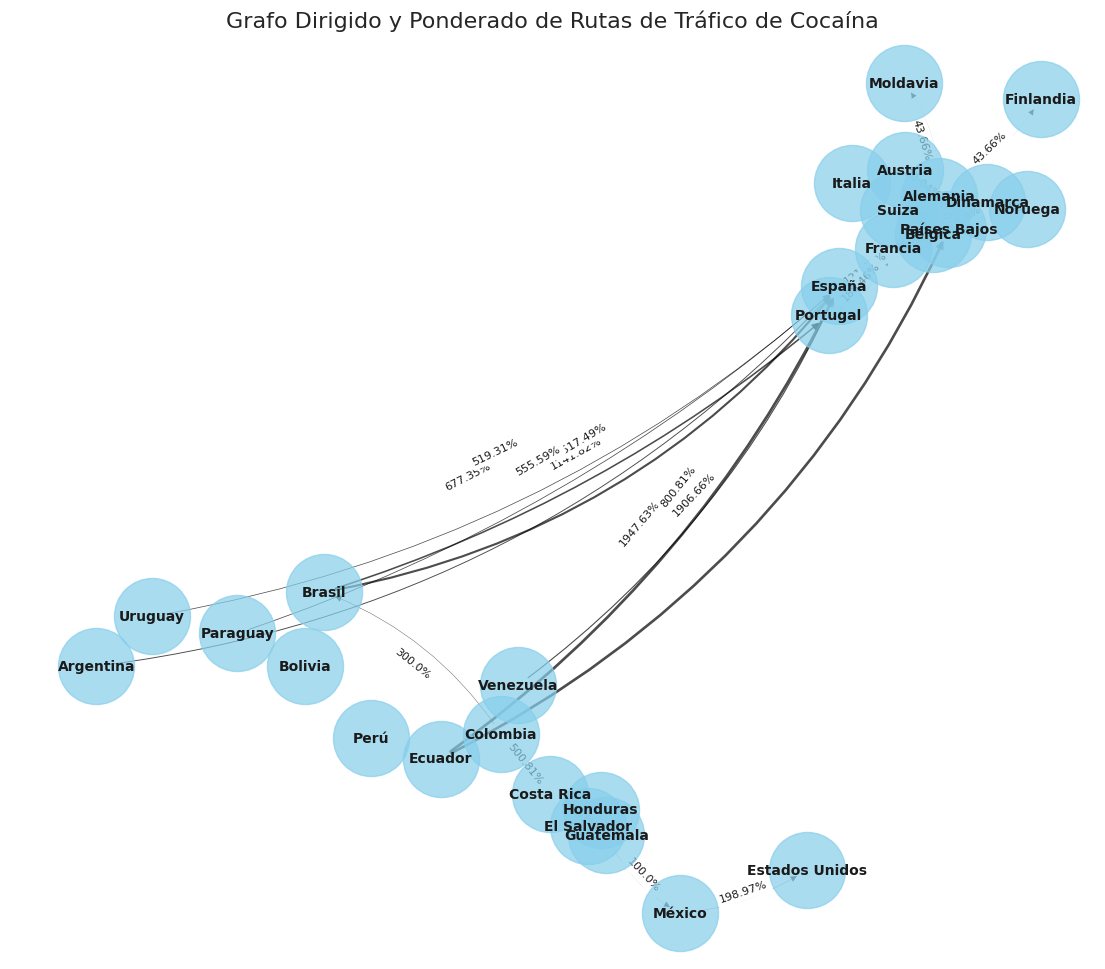

In [59]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Diccionario con las coordenadas geográficas de los países (latitud, longitud)
country_coordinates = {
    'Colombia': (4.5709, -74.2973),
    'Perú': (-9.189967, -75.015152),
    'Bolivia': (-16.290154, -63.588653),
    'México': (23.634501, -102.552784),
    'Costa Rica': (9.748917, -83.753428),
    'Guatemala': (15.783471, -90.230759),
    'Honduras': (15.199999, -86.241905),
    'El Salvador': (13.794185, -88.89653),
    'Estados Unidos': (37.09024, -95.712891),
    'Brasil': (-14.235004, -51.92528),
    'Ecuador': (-1.831239, -78.183406),
    'Venezuela': (6.42375, -66.58973),
    'Argentina': (-38.416097, -63.616672),
    'Paraguay': (-23.442503, -58.443832),
    'Uruguay': (-32.522779, -55.765835),
    'España': (40.463667, -3.74922),
    'Portugal': (39.399872, -8.224454),
    'Bélgica': (50.503887, 4.469936),
    'Países Bajos': (52.132633, 5.291266),
    'Alemania': (51.165691, 10.451526),
    'Finlandia': (61.92411, 25.748151),
    'Moldavia': (47.411631, 28.369885),
    'Austria': (47.516231, 14.550072),
    'Noruega': (60.472024, 8.468946),
    'Francia': (46.227638, 2.213749),
    'Italia': (41.87194, 12.56738),
    'Suiza': (46.818188, 8.227512),
    'Dinamarca': (56.26392, 9.501785)
}

# Crear el grafo dirigido
G = nx.DiGraph()

# Añadir los nodos con sus coordenadas
for country, coords in country_coordinates.items():
    G.add_node(country, pos=coords)

# Añadir las aristas basadas en las rutas de tráfico y sus ponderaciones (incremento de precio)
rutas_trafico = [
    ('Colombia', 'Costa Rica', 500.81),
    ('Costa Rica', 'Guatemala', 81.97),
    ('Guatemala', 'México', 100.0),
    ('México', 'Estados Unidos', 198.97),
    ('Colombia', 'Brasil', 300.0),
    ('Brasil', 'Portugal', 1141.82),
    ('Brasil', 'España', 1517.49),
    ('Ecuador', 'España', 1947.63),
    ('Ecuador', 'Países Bajos', 1906.66),
    ('Venezuela', 'España', 800.81),
    ('Argentina', 'España', 677.35),
    ('Paraguay', 'España', 555.59),
    ('Uruguay', 'España', 519.31),
    ('Portugal', 'Francia', 188.46),
    ('España', 'Francia', 121.47),
    ('Francia', 'Alemania', 50.0),
    ('Alemania', 'Austria', 20.04),
    ('Alemania', 'Finlandia', 43.66),
    ('Países Bajos', 'Alemania', 30.0),
    ('Bélgica', 'Alemania', 25.0),
    ('Bélgica', 'Francia', 15.0),
    ('Países Bajos', 'Bélgica', 10.0),
    ('Países Bajos', 'Dinamarca', 5.0),
    ('Dinamarca', 'Noruega', 3.0),
    ('Alemania', 'Moldavia', 43.66)
]

for ruta in rutas_trafico:
    G.add_edge(ruta[0], ruta[1], weight=ruta[2])  # Añadir arista con ponderación

# Obtener las posiciones de los nodos (coordenadas geográficas)
pos = nx.get_node_attributes(G, 'pos')

# Configurar el tamaño de la figura
plt.figure(figsize=(14, 12))

# Dibujar los nodos con un color más atractivo y tamaño adecuado
nx.draw_networkx_nodes(G, pos, node_size=3000, node_color='skyblue', alpha=0.7)

# Dibujar las etiquetas de los nodos (países)
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

# Dibujar las aristas con grosor proporcional a la ponderación y mayor suavidad
edge_weights = nx.get_edge_attributes(G, 'weight')

# Personalizar la estética de las aristas con un color más suave y curvado
for edge, weight in edge_weights.items():
    u, v = edge
    x_values = [pos[u][1], pos[v][1]]  # Longitudes (x)
    y_values = [pos[u][0], pos[v][0]]  # Latitudes (y)

    # Hacer las aristas curvadas para una mejor visualización
    curvature = 0.1 * np.random.uniform(1, 2)  # Control de la curvatura de las aristas
    nx.draw_networkx_edges(G, pos, edgelist=[edge], width=weight / 1000, alpha=0.7, edge_color='black', style='solid', connectionstyle=f'arc3,rad={curvature}')

# Dibujar las etiquetas de las aristas (ponderaciones) con mayor claridad
edge_labels = {(u, v): f"{d['weight']}%" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# Título y ajustes finales
plt.title("Grafo Dirigido y Ponderado de Rutas de Tráfico de Cocaína", fontsize=16)
plt.axis('off')  # Desactivar el eje para una mejor visualización
plt.show()


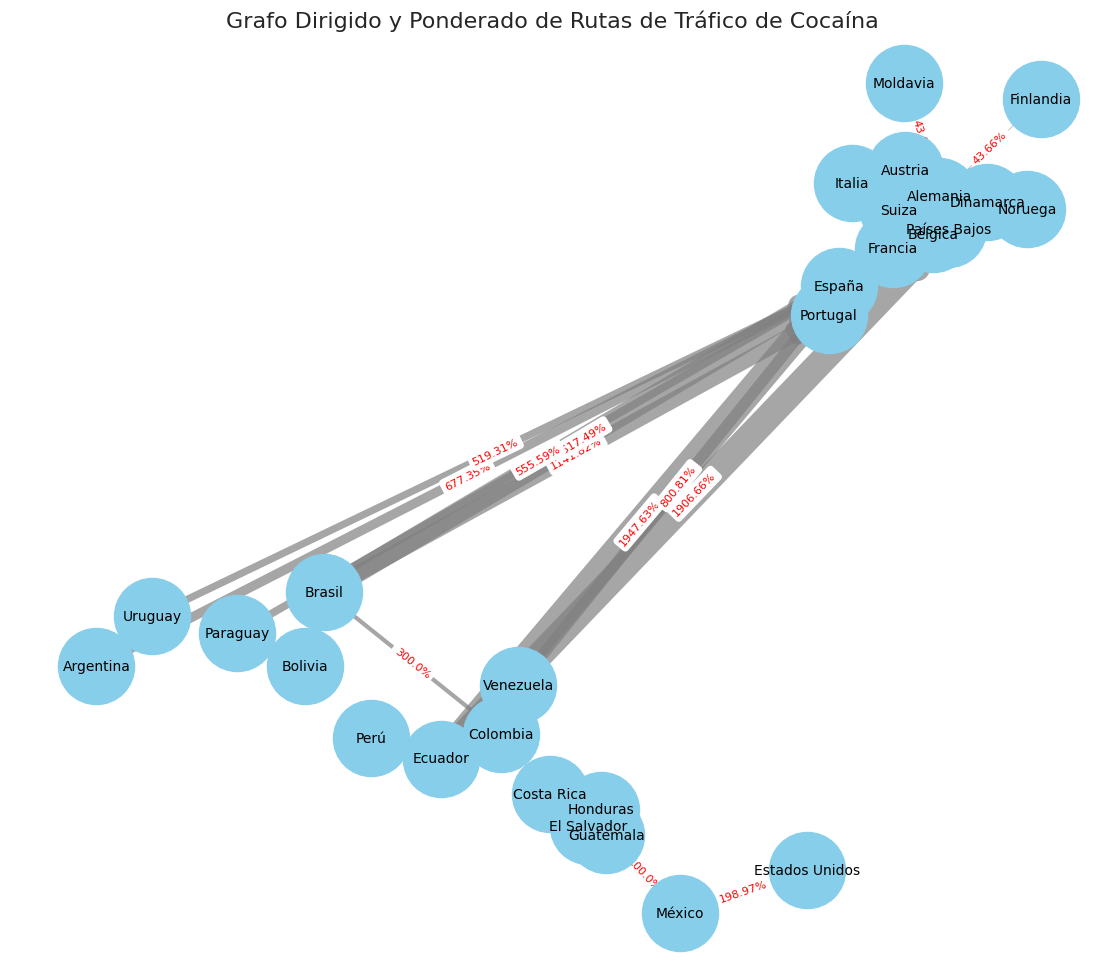

In [60]:
import networkx as nx
import matplotlib.pyplot as plt

# Diccionario con las coordenadas geográficas de los países (latitud, longitud)
country_coordinates = {
    'Colombia': (4.5709, -74.2973),
    'Perú': (-9.189967, -75.015152),
    'Bolivia': (-16.290154, -63.588653),
    'México': (23.634501, -102.552784),
    'Costa Rica': (9.748917, -83.753428),
    'Guatemala': (15.783471, -90.230759),
    'Honduras': (15.199999, -86.241905),
    'El Salvador': (13.794185, -88.89653),
    'Estados Unidos': (37.09024, -95.712891),
    'Brasil': (-14.235004, -51.92528),
    'Ecuador': (-1.831239, -78.183406),
    'Venezuela': (6.42375, -66.58973),
    'Argentina': (-38.416097, -63.616672),
    'Paraguay': (-23.442503, -58.443832),
    'Uruguay': (-32.522779, -55.765835),
    'España': (40.463667, -3.74922),
    'Portugal': (39.399872, -8.224454),
    'Bélgica': (50.503887, 4.469936),
    'Países Bajos': (52.132633, 5.291266),
    'Alemania': (51.165691, 10.451526),
    'Finlandia': (61.92411, 25.748151),
    'Moldavia': (47.411631, 28.369885),
    'Austria': (47.516231, 14.550072),
    'Noruega': (60.472024, 8.468946),
    'Francia': (46.227638, 2.213749),
    'Italia': (41.87194, 12.56738),
    'Suiza': (46.818188, 8.227512),
    'Dinamarca': (56.26392, 9.501785)
}

# Crear el grafo dirigido
G = nx.DiGraph()

# Añadir los nodos con sus coordenadas
for country, coords in country_coordinates.items():
    G.add_node(country, pos=coords)

# Añadir las aristas basadas en las rutas de tráfico y sus ponderaciones (incremento de precio)
rutas_trafico = [
    ('Colombia', 'Costa Rica', 500.81),  # Colombia → Costa Rica: 500.81% de incremento
    ('Costa Rica', 'Guatemala', 81.97),  # Costa Rica → Guatemala: 81.97% de incremento
    ('Guatemala', 'México', 100.0),     # Ejemplo: Guatemala → México: 100% de incremento
    ('México', 'Estados Unidos', 198.97),  # México → Estados Unidos: 198.97% de incremento
    ('Colombia', 'Brasil', 300.0),      # Ejemplo: Colombia → Brasil: 300% de incremento
    ('Brasil', 'Portugal', 1141.82),    # Brasil → Portugal: 1141.82% de incremento
    ('Brasil', 'España', 1517.49),      # Brasil → España: 1517.49% de incremento
    ('Ecuador', 'España', 1947.63),     # Ecuador → España: 1947.63% de incremento
    ('Ecuador', 'Países Bajos', 1906.66),  # Ecuador → Países Bajos: 1906.66% de incremento
    ('Venezuela', 'España', 800.81),    # Venezuela → España: 800.81% de incremento
    ('Argentina', 'España', 677.35),    # Argentina → España: 677.35% de incremento
    ('Paraguay', 'España', 555.59),     # Paraguay → España: 555.59% de incremento
    ('Uruguay', 'España', 519.31),      # Uruguay → España: 519.31% de incremento
    ('Portugal', 'Francia', 188.46),    # Portugal → Francia: 188.46% de incremento
    ('España', 'Francia', 121.47),      # España → Francia: 121.47% de incremento
    ('Francia', 'Alemania', 50.0),      # Ejemplo: Francia → Alemania: 50% de incremento
    ('Alemania', 'Austria', 20.04),     # Alemania → Austria: 20.04% de incremento
    ('Alemania', 'Finlandia', 43.66),   # Alemania → Finlandia: 43.66% de incremento
    ('Países Bajos', 'Alemania', 30.0), # Ejemplo: Países Bajos → Alemania: 30% de incremento
    ('Bélgica', 'Alemania', 25.0),      # Ejemplo: Bélgica → Alemania: 25% de incremento
    ('Bélgica', 'Francia', 15.0),       # Ejemplo: Bélgica → Francia: 15% de incremento
    ('Países Bajos', 'Bélgica', 10.0),  # Ejemplo: Países Bajos → Bélgica: 10% de incremento
    ('Países Bajos', 'Dinamarca', 5.0), # Ejemplo: Países Bajos → Dinamarca: 5% de incremento
    ('Dinamarca', 'Noruega', 3.0),      # Ejemplo: Dinamarca → Noruega: 3% de incremento
    ('Alemania', 'Moldavia', 43.66)     # Alemania → Moldavia: 43.66% de incremento
]

for ruta in rutas_trafico:
    G.add_edge(ruta[0], ruta[1], weight=ruta[2])  # Añadir arista con ponderación

# Obtener las posiciones de los nodos (coordenadas geográficas)
pos = nx.get_node_attributes(G, 'pos')

# Dibujar el grafo con las posiciones geográficas
plt.figure(figsize=(14, 12))

# Dibujar los nodos
nx.draw_networkx_nodes(G, pos, node_size=3000, node_color='skyblue')

# Dibujar las etiquetas de los nodos
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

# Dibujar las aristas con grosor proporcional a la ponderación
edge_weights = nx.get_edge_attributes(G, 'weight')
for edge, weight in edge_weights.items():
    nx.draw_networkx_edges(
        G, pos, edgelist=[edge],
        width=weight/100,  # Grosor de la arista proporcional a la ponderación
        alpha=0.7,
        edge_color='gray',
        arrowstyle='->',  # Flechas para indicar dirección
        arrowsize=15
    )

# Dibujar las etiquetas de las aristas (ponderaciones)
edge_labels = {(u, v): f"{d['weight']}%" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, font_color='red')

# Ajustar el aspecto del gráfico
plt.title("Grafo Dirigido y Ponderado de Rutas de Tráfico de Cocaína", fontsize=16)
plt.axis('off')  # Ocultar los ejes
plt.show()

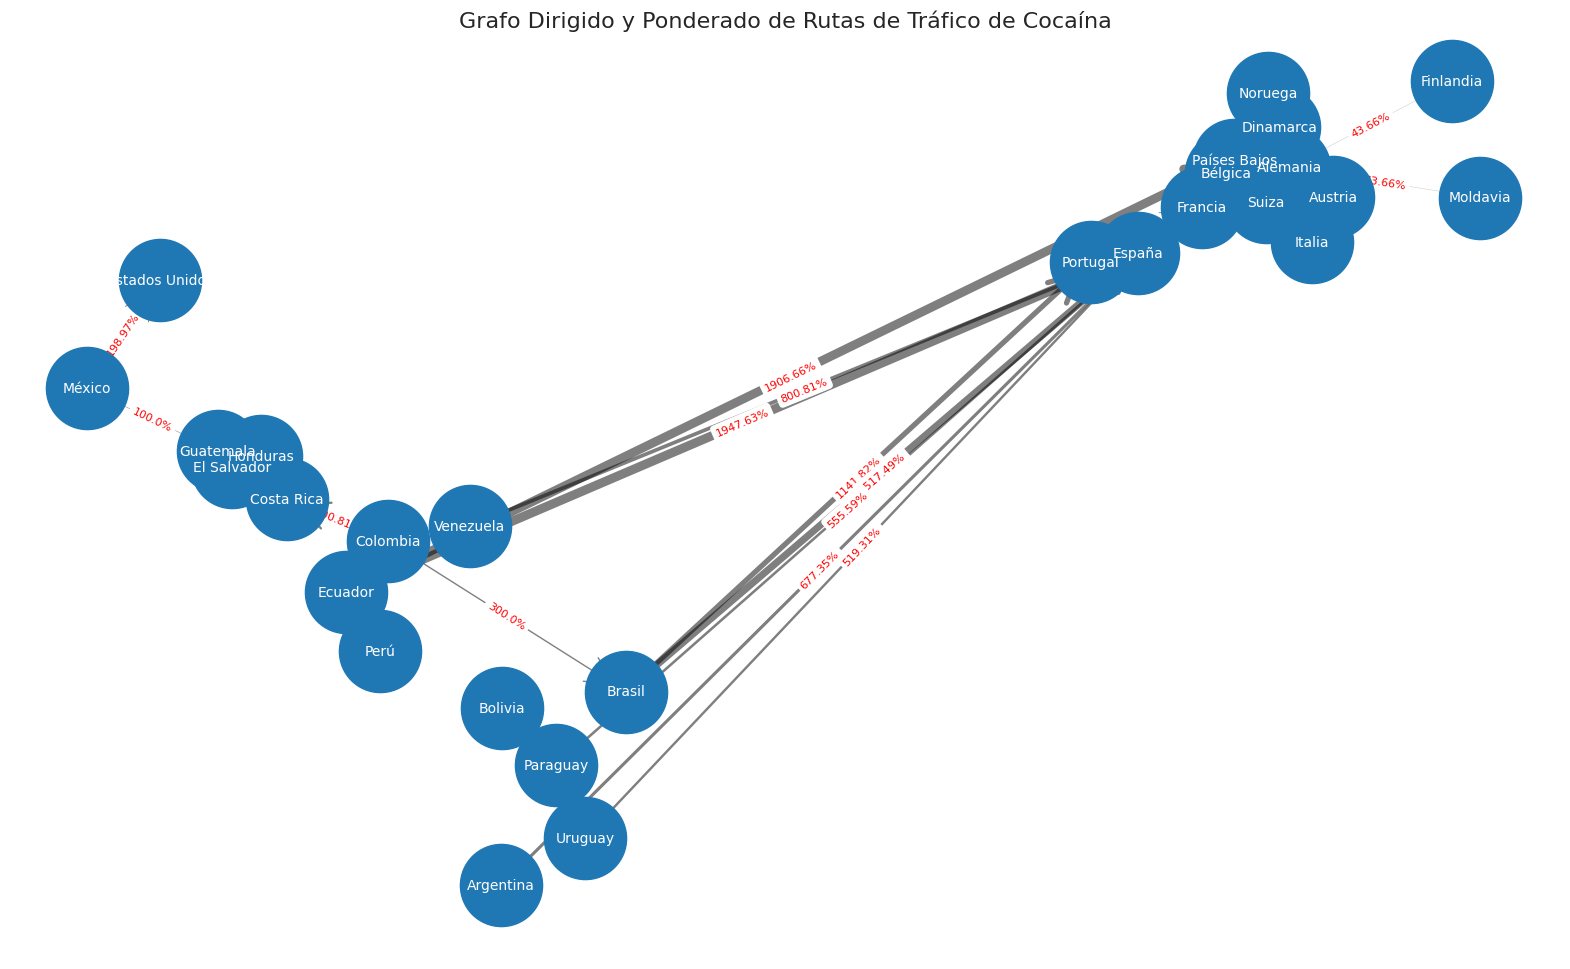

In [96]:
import networkx as nx
import matplotlib.pyplot as plt

# Diccionario con las coordenadas geográficas de los países (latitud, longitud)
country_coordinates = {
    'Colombia': (4.5709, -74.2973),
    'Perú': (-9.189967, -75.015152),
    'Bolivia': (-16.290154, -63.588653),
    'México': (23.634501, -102.552784),
    'Costa Rica': (9.748917, -83.753428),
    'Guatemala': (15.783471, -90.230759),
    'Honduras': (15.199999, -86.241905),
    'El Salvador': (13.794185, -88.89653),
    'Estados Unidos': (37.09024, -95.712891),
    'Brasil': (-14.235004, -51.92528),
    'Ecuador': (-1.831239, -78.183406),
    'Venezuela': (6.42375, -66.58973),
    'Argentina': (-38.416097, -63.616672),
    'Paraguay': (-23.442503, -58.443832),
    'Uruguay': (-32.522779, -55.765835),
    'España': (40.463667, -3.74922),
    'Portugal': (39.399872, -8.224454),
    'Bélgica': (50.503887, 4.469936),
    'Países Bajos': (52.132633, 5.291266),
    'Alemania': (51.165691, 10.451526),
    'Finlandia': (61.92411, 25.748151),
    'Moldavia': (47.411631, 28.369885),
    'Austria': (47.516231, 14.550072),
    'Noruega': (60.472024, 8.468946),
    'Francia': (46.227638, 2.213749),
    'Italia': (41.87194, 12.56738),
    'Suiza': (46.818188, 8.227512),
    'Dinamarca': (56.26392, 9.501785)
}

# Calcular los rangos de latitudes y longitudes para normalizar
latitudes = [coords[0] for coords in country_coordinates.values()]
longitudes = [coords[1] for coords in country_coordinates.values()]

# Normalización de las latitudes y longitudes
lat_min, lat_max = min(latitudes), max(latitudes)
long_min, long_max = min(longitudes), max(longitudes)

# Función para normalizar las coordenadas
def normalize_latitude(lat):
    return (lat - lat_min) / (lat_max - lat_min)  # Normalizar latitud al rango [0, 1]

def normalize_longitude(lon):
    return (lon - long_min) / (long_max - long_min)  # Normalizar longitud al rango [0, 1]

# Crear el grafo dirigido
G = nx.DiGraph()

# Añadir los nodos con sus coordenadas normalizadas
for country, coords in country_coordinates.items():
    lat, lon = coords
    normalized_lat = normalize_latitude(lat)
    normalized_lon = normalize_longitude(lon)
    G.add_node(country, pos=(normalized_lon, normalized_lat))  # Invertir latitudes para que el norte esté arriba

# Añadir las aristas basadas en las rutas de tráfico y sus ponderaciones (incremento de precio)
rutas_trafico = [
    ('Colombia', 'Costa Rica', 500.81),
    ('Costa Rica', 'Guatemala', 81.97),
    ('Guatemala', 'México', 100.0),
    ('México', 'Estados Unidos', 198.97),
    ('Colombia', 'Brasil', 300.0),
    ('Brasil', 'Portugal', 1141.82),
    ('Brasil', 'España', 1517.49),
    ('Ecuador', 'España', 1947.63),
    ('Ecuador', 'Países Bajos', 1906.66),
    ('Venezuela', 'España', 800.81),
    ('Argentina', 'España', 677.35),
    ('Paraguay', 'España', 555.59),
    ('Uruguay', 'España', 519.31),
    ('Portugal', 'Francia', 188.46),
    ('España', 'Francia', 121.47),
    ('Francia', 'Alemania', 50.0),
    ('Alemania', 'Austria', 20.04),
    ('Alemania', 'Finlandia', 43.66),
    ('Países Bajos', 'Alemania', 30.0),
    ('Bélgica', 'Alemania', 25.0),
    ('Bélgica', 'Francia', 15.0),
    ('Países Bajos', 'Bélgica', 10.0),
    ('Países Bajos', 'Dinamarca', 5.0),
    ('Dinamarca', 'Noruega', 3.0),
    ('Alemania', 'Moldavia', 43.66)
]

for ruta in rutas_trafico:
    G.add_edge(ruta[0], ruta[1], weight=ruta[2])  # Añadir arista con ponderación

# Obtener las posiciones de los nodos (coordenadas normalizadas)
pos = nx.get_node_attributes(G, 'pos')

# Dibujar el grafo con las posiciones geográficas
plt.figure(figsize=(20,12))

# Dibujar los nodos
nx.draw_networkx_nodes(G, pos, node_size=3500)

# Dibujar las etiquetas de los nodos
nx.draw_networkx_labels(G, pos, font_size=10, font_color='white')

# Dibujar las aristas con grosor proporcional a la ponderación
edge_weights = nx.get_edge_attributes(G, 'weight')
for edge, weight in edge_weights.items():
    nx.draw_networkx_edges(
        G, pos, edgelist=[edge],
        width=weight/300,  # Grosor de la arista proporcional a la ponderación
        alpha=0.5,
        edge_color='black',
        arrowstyle='->',  # Flechas para indicar dirección
        arrowsize=50
    )

# Dibujar las etiquetas de las aristas (ponderaciones)
edge_labels = {(u, v): f"{d['weight']}%" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, font_color='red')

# Ajustar el aspecto del gráfico
plt.title("Grafo Dirigido y Ponderado de Rutas de Tráfico de Cocaína", fontsize=16)
plt.axis('off')  # Ocultar los ejes
plt.show()
